<a href="https://colab.research.google.com/github/thanishka220/ales-Data-Analysis-with-SQL-in-Python/blob/main/sales_sql_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pandas matplotlib


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
DB_PATH = "sales_data.db"

def create_sample_db():
    if os.path.exists(DB_PATH):
        os.remove(DB_PATH)
        print(f"Removed existing {DB_PATH} to create a fresh sample database.")

    conn = sqlite3.connect(DB_PATH)
    cur = conn.cursor()

    cur.execute("""
        CREATE TABLE sales (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            product TEXT NOT NULL,
            quantity INTEGER NOT NULL,
            price REAL NOT NULL,
            sale_date TEXT
        );
    """)

    sample_data = [
        ("Widget A", 10, 9.99, "2025-08-01"),
        ("Widget B", 5, 19.99, "2025-08-02"),
        ("Gadget C", 7, 14.50, "2025-08-03"),
        ("Widget A", 3, 9.99, "2025-08-04"),
        ("Gadget C", 2, 14.50, "2025-08-05"),
        ("Widget B", 8, 19.99, "2025-08-06"),
        ("Accessory D", 20, 4.75, "2025-08-07"),
    ]

    cur.executemany(
        "INSERT INTO sales (product, quantity, price, sale_date) VALUES (?, ?, ?, ?)",
        sample_data
    )
    conn.commit()
    conn.close()
    print(f"Created {DB_PATH} with {len(sample_data)} sample rows.")

create_sample_db()

Created sales_data.db with 7 sample rows.


In [4]:
conn = sqlite3.connect(DB_PATH)

query = """
SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""
df = pd.read_sql_query(query, conn)

query_totals = """
SELECT SUM(quantity) AS total_qty, SUM(quantity * price) AS total_revenue
FROM sales;
"""
totals_df = pd.read_sql_query(query_totals, conn)

conn.close()


In [5]:
print("\n--- Sales by Product ---")
print(df)

print("\n--- Overall Totals ---")
print(totals_df)


--- Sales by Product ---
       product  total_qty  revenue
0     Widget B         13   259.87
1     Gadget C          9   130.50
2     Widget A         13   129.87
3  Accessory D         20    95.00

--- Overall Totals ---
   total_qty  total_revenue
0         55         615.24


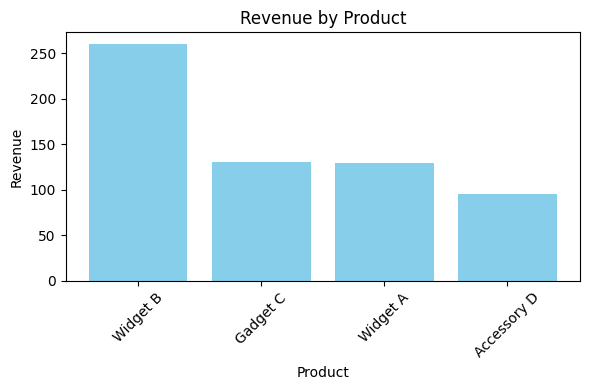

In [6]:
plt.figure(figsize=(6,4))
plt.bar(df["product"], df["revenue"], color="skyblue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
